# Customer Profile

The demonstration of the use of Python CustomerProfile package. The package is created for easy-to-use customer segmentation using Python and sklearn clustering. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from utils import K_Means
from Preprocessing.scaler import MinMaxScaler, StandardScaler
from Preprocessing.outlier import ZScore
from CustomerProfile import CustomerProfile
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Importing the dataset, preparing for the segmentation

In [3]:
data_path = './Data/marketing_campaign.csv'

In [4]:
raw_data = pd.read_csv(data_path, sep='\t')

In [5]:
raw_data["Spent"] = raw_data["MntWines"] + raw_data["MntFruits"] + raw_data["MntMeatProducts"] + raw_data["MntFishProducts"] + raw_data["MntSweetProducts"] + raw_data["MntGoldProds"]
raw_data["Spent"] = raw_data["Spent"].astype(float) 
raw_data.drop(["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], axis=1, inplace=True)
data = raw_data.copy()
data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
data.dropna(inplace=True)

In [6]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,1617.0
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,27.0
2,1965,Graduation,Together,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,776.0
3,1984,Graduation,Together,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0,53.0
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,2,9,3,4,5,0,0,0,0,0,0,0,1341.0
2236,1946,PhD,Together,64014.0,2,1,56,7,8,2,5,7,0,0,0,1,0,0,0,444.0
2237,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,13,6,0,1,0,0,0,0,0,1241.0
2238,1956,Master,Together,69245.0,0,1,8,2,6,5,10,3,0,0,0,0,0,0,0,843.0


In [7]:
profiles = CustomerProfile(data=data, target_column='Spent', clustering=K_Means, segmentation='demographic', columns='all')

>>>> Customer Segmentation instance created with the following parameters:

- Clustering: K_Means
- Segmentation type: demographic
- Columns used: ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Spent']
- Target column: Spent

>>>> Warnings <<<<
- Warning: high number of dimensions detected (>10), it is recommended to have less than 10 features. If you think all the features used are highly informative, continue confidently.


In [8]:
profiles.preprocess(scaler=MinMaxScaler(), outlier=ZScore(column=['Spent','Income']))

One-hot encoding - Done!
There were 3 upper outliers and 0 lower outliers found in column "Spent". Clipping...
There were 8 upper outliers and 0 lower outliers found in column "Income". Clipping...
Outlier handling - Done!
Scaling using MinMaxScaler - Done!


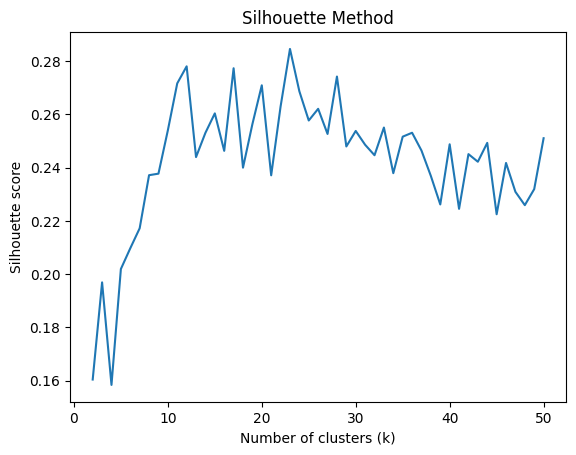

The data is fitted. The optimal number of clusters found using silhouette method is 23.


In [9]:
profiles.fit(method = 'silhouette', max_k=50)

In [10]:
profiles.report(save=True, save_path ='./Report/Report.csv')

                                               Report  - demographic segmentation.

Cluster 0 - Spent = 1716.362745

Year_Birth                  1970.784314
Income                     83013.333333
Kidhome                        0.058824
Teenhome                       0.098039
Recency                       45.000000
NumDealsPurchases              0.960784
NumWebPurchases                5.588235
NumCatalogPurchases            6.941176
NumStorePurchases              7.901961
NumWebVisitsMonth              3.176471
AcceptedCmp3                   0.215686
AcceptedCmp4                   0.470588
AcceptedCmp5                   0.882353
AcceptedCmp1                   0.901961
AcceptedCmp2                   0.196078
Complain                       0.000000
Response                       0.803922
Spent                       1716.362745
Education_2n Cycle             0.000000
Education_Basic               -0.000000
Education_Graduation           1.000000
Education_Master               0.000000
Edu